<a href="https://colab.research.google.com/github/mokhtazerdali/ATtiny-device-examples/blob/main/Oscillator_LC_Energy_and_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

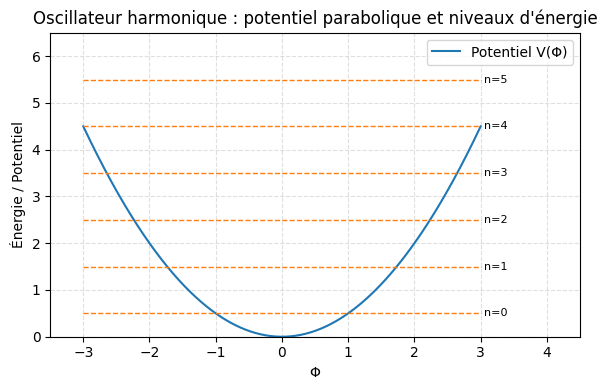

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres physiques
hbar = 1.0
omega = 1.0
C = 1.0

# Axe en Φ pour la parabole
phi = np.linspace(-3, 3, 400)
V = 0.5 * C * omega**2 * phi**2   # V(Φ) = 1/2 C ω^2 Φ^2

# Niveaux d'énergie
n_max = 5
n = np.arange(0, n_max+1)
E = hbar * omega * (n + 0.5)

plt.figure(figsize=(6,4))

# Parabole du potentiel
plt.plot(phi, V, label="Potentiel V(Φ)")

# Niveaux d'énergie : barres horizontales
for k, Ek in zip(n, E):
    # on trace une petite ligne horizontale au niveau Ek
    plt.hlines(Ek, -3, 3, colors='C1', linestyles='--', linewidth=1)
    plt.text(3.05, Ek, f"n={k}", va='center', fontsize=8)

plt.xlim(-3.5, 4.5)
plt.ylim(0, E[-1] + 1)

plt.xlabel("Φ")
plt.ylabel("Énergie / Potentiel")
plt.title("Oscillateur harmonique : potentiel parabolique et niveaux d'énergie")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


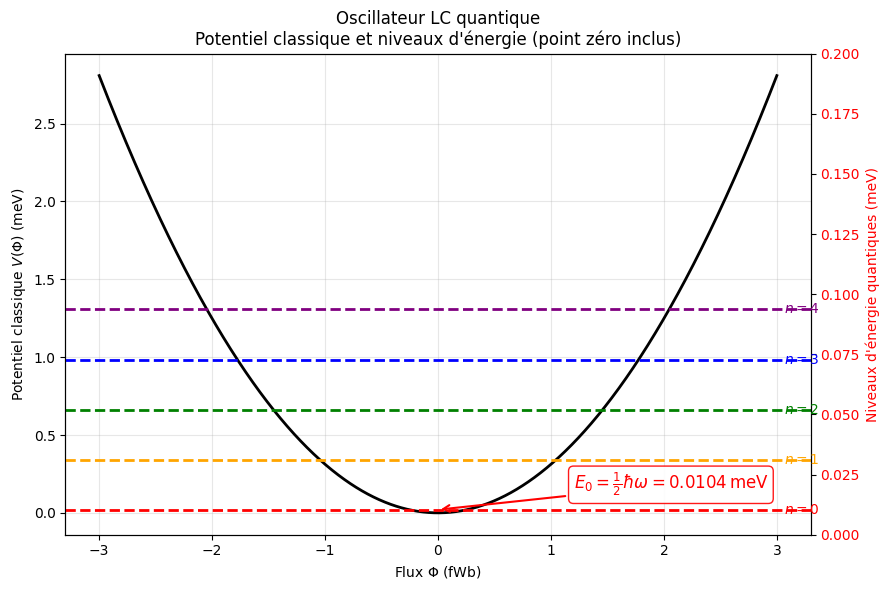

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e

# ============================================================
# 1. PARAMÈTRES DU CIRCUIT LC
# ============================================================
L = 10e-9       # Inductance (H)
C = 100e-15     # Capacité (F)

omega = 1.0 / np.sqrt(L * C)

# ============================================================
# 2. AXE DU FLUX
# ============================================================
phi_max = 3e-15  # Weber
phi = np.linspace(-phi_max, phi_max, 2000)

# ============================================================
# 3. POTENTIEL CLASSIQUE
# ============================================================
V_J = phi**2 / (2 * L)
V_meV = V_J / e * 1e3

# ============================================================
# 4. NIVEAUX D'ÉNERGIE QUANTIQUES
# ============================================================
n = np.arange(5)
E_n_J = hbar * omega * (n + 0.5)
E_n_meV = E_n_J / e * 1e3
E0 = E_n_meV[0]

# ============================================================
# 5. GRAPHE À DEUX AXES Y
# ============================================================
fig, ax_pot = plt.subplots(figsize=(9, 6))

# ---- Axe Y gauche : potentiel
ax_pot.plot(
    phi * 1e15,
    V_meV,
    color="black",
    lw=2
)
ax_pot.set_xlabel(r"Flux $\Phi$ (fWb)")
ax_pot.set_ylabel("Potentiel classique $V(\\Phi)$ (meV)", color="black")
ax_pot.tick_params(axis="y", labelcolor="black")
ax_pot.grid(alpha=0.3)

# ---- Axe Y droit : niveaux quantiques
ax_levels = ax_pot.twinx()

colors = ["red", "orange", "green", "blue", "purple"]

for ni, Ei, col in zip(n, E_n_meV, colors):
    ax_levels.axhline(
        Ei,
        color=col,
        lw=2,
        linestyle="--"
    )
    ax_levels.text(
        phi_max * 1e15 * 1.02,
        Ei,
        rf"$n={ni}$",
        color=col,
        va="center"
    )
# >>> AJOUT ICI <<<
ax_levels.set_ylim(0, 0.2)  # en meV
# ---- Annotation du niveau fondamental
ax_levels.annotate(
    rf"$E_0=\frac{{1}}{{2}}\hbar\omega = {E0:.4f}\,\mathrm{{meV}}$",
    xy=(0, E0),
    xytext=(phi_max * 1e15 * 0.4, E0 * 1.8),
    arrowprops=dict(arrowstyle="->", color="red", lw=1.5),
    fontsize=12,
    color="red",
    bbox=dict(boxstyle="round", fc="white", ec="red", alpha=0.9)
)

ax_levels.set_ylabel("Niveaux d'énergie quantiques (meV)", color="red")
ax_levels.tick_params(axis="y", labelcolor="red")

# ============================================================
# 6. TITRE
# ============================================================
plt.title(
    "Oscillateur LC quantique\n"
    "Potentiel classique et niveaux d'énergie (point zéro inclus)"
)

plt.tight_layout()
plt.show()


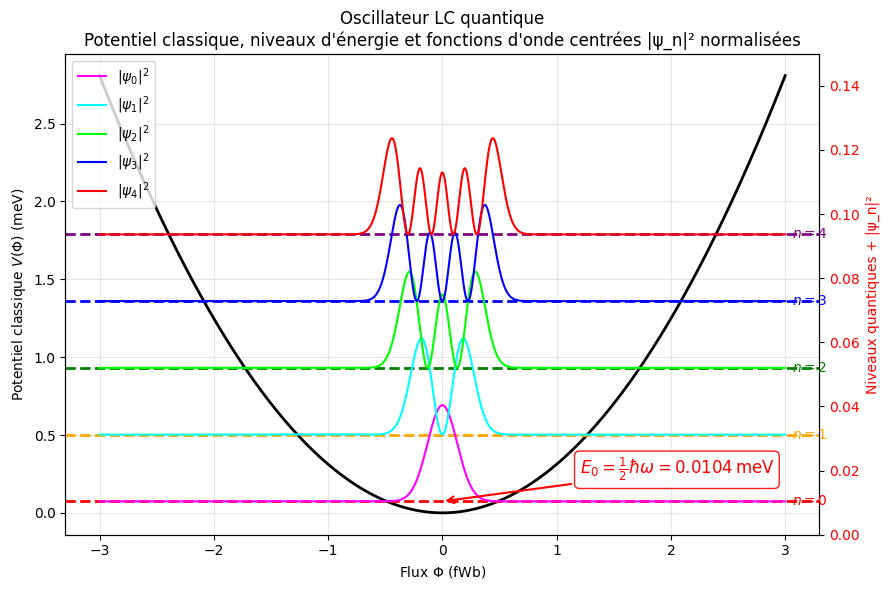

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e
from scipy.special import hermite
from math import factorial

# ============================================================
# 1. PARAMÈTRES DU CIRCUIT LC
# ============================================================
L = 10e-9       # Inductance (H)
C = 100e-15     # Capacité (F)
omega = 1.0 / np.sqrt(L * C)

# ============================================================
# 2. AXE DU FLUX
# ============================================================
phi_max = 3e-15  # Weber
phi = np.linspace(-phi_max, phi_max, 2000)

# ============================================================
# 3. POTENTIEL CLASSIQUE
# ============================================================
V_J = phi**2 / (2 * L)
V_meV = V_J / e * 1e3

# ============================================================
# 4. NIVEAUX D'ÉNERGIE QUANTIQUES
# ============================================================
n = np.arange(5)
E_n_J = hbar * omega * (n + 0.5)
E_n_meV = E_n_J / e * 1e3
E0 = E_n_meV[0]

# ============================================================
# 5. CALCUL DES FONCTIONS D'ONDES NORMALISÉES POUR n=0,1,2
# ============================================================
xi = phi * np.sqrt(C * omega / hbar)
psi_squared = {}

# On veut que la probabilité "oscille" autour du niveau E_n et reste dans 0-0.2 meV
max_amplitude = 0.03 # amplitude verticale maximale pour les ψ²

for ni in [0, 1, 2, 3, 4]:
    Hn = hermite(ni)(xi)
    norm = 1.0 / np.sqrt(2**ni * factorial(ni)) * (C*omega/(np.pi*hbar))**0.25
    psi = norm * Hn * np.exp(-xi**2 / 2)
    psi2 = psi**2
    psi2 /= psi2.max()  # normalisation à 1
    psi_squared[ni] = psi2 * max_amplitude + E_n_meV[ni]  # centré sur le niveau

# ============================================================
# 6. GRAPHE À DEUX AXES Y
# ============================================================
fig, ax_pot = plt.subplots(figsize=(9, 6))

# ---- Axe Y gauche : potentiel classique
ax_pot.plot(phi*1e15, V_meV, color="black", lw=2)
ax_pot.set_xlabel(r"Flux $\Phi$ (fWb)")
ax_pot.set_ylabel("Potentiel classique $V(\\Phi)$ (meV)", color="black")
ax_pot.tick_params(axis="y", labelcolor="black")
ax_pot.grid(alpha=0.3)

# ---- Axe Y droit : niveaux quantiques + ψ²
ax_levels = ax_pot.twinx()
colors_levels = ["red", "orange", "green", "blue", "purple"]
colors_psi = ["magenta", "cyan", "lime","blue", "red"]

# Tracé des niveaux quantiques
for ni, Ei, col in zip(n, E_n_meV, colors_levels):
    ax_levels.axhline(Ei, color=col, lw=2, linestyle="--")
    ax_levels.text(phi_max*1e15*1.02, Ei, rf"$n={ni}$", color=col, va="center")

# Limites Y droit
ax_levels.set_ylim(0, 0.15)
ax_levels.set_ylabel("Niveaux quantiques + |ψ_n|²", color="red")
ax_levels.tick_params(axis="y", labelcolor="red")

# Tracé des fonctions d'onde ψ² centrées et normalisées
for ni, col in zip([0,1,2,3,4], colors_psi):
    ax_levels.plot(
        phi*1e15,
        psi_squared[ni],
        color=col,
        lw=1.5,
        label=rf"$|\psi_{ni}|^2$"
    )

# Annotation niveau fondamental
ax_levels.annotate(
    rf"$E_0=\frac{{1}}{{2}}\hbar\omega = {E0:.4f}\,\mathrm{{meV}}$",
    xy=(0, E0),
    xytext=(phi_max*1e15*0.4, E0*1.8),
    arrowprops=dict(arrowstyle="->", color="red", lw=1.5),
    fontsize=12,
    color="red",
    bbox=dict(boxstyle="round", fc="white", ec="red", alpha=0.9)
)

# Légende
ax_levels.legend(loc="upper left")

# ============================================================
# 7. TITRE
# ============================================================
plt.title(
    "Oscillateur LC quantique\n"
    "Potentiel classique, niveaux d'énergie et fonctions d'onde centrées |ψ_n|² normalisées"
)

plt.tight_layout()
plt.show()


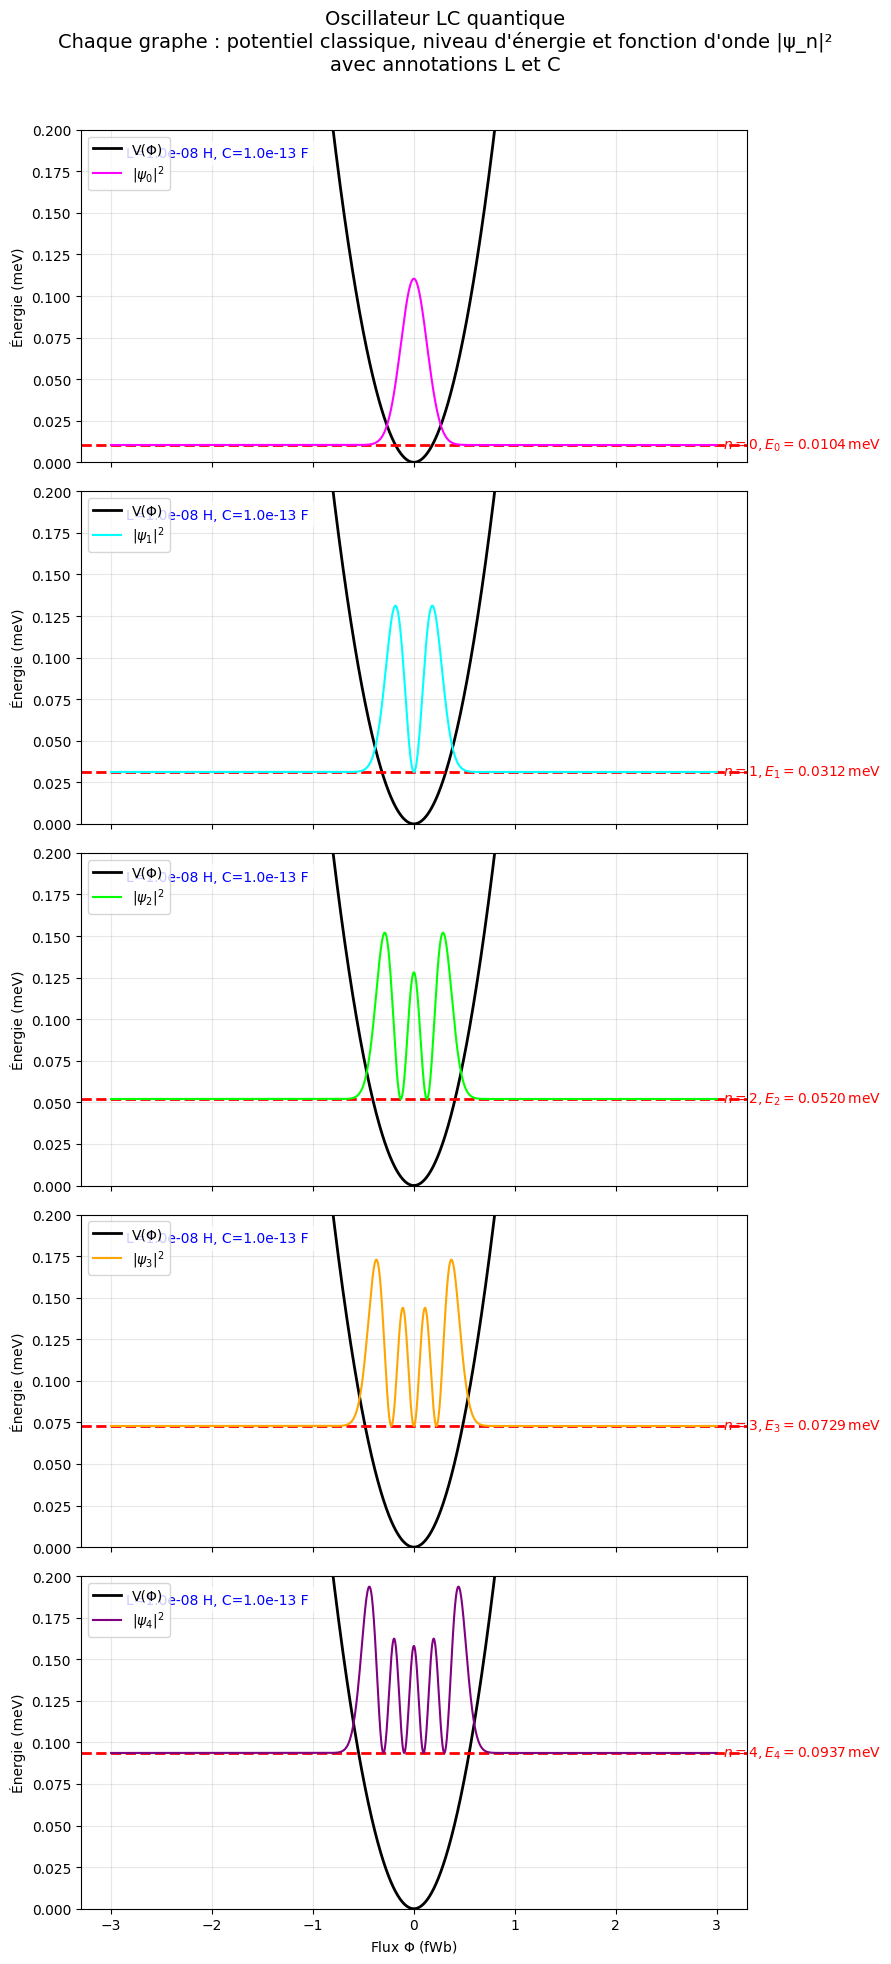

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e
from scipy.special import hermite
from math import factorial

# ============================================================
# 1. PARAMÈTRES DU CIRCUIT LC
# ============================================================
L = 10e-9       # Inductance (H)
C = 100e-15     # Capacité (F)
omega = 1.0 / np.sqrt(L * C)

# ============================================================
# 2. AXE DU FLUX
# ============================================================
phi_max = 3e-15  # Weber
phi = np.linspace(-phi_max, phi_max, 2000)

# ============================================================
# 3. POTENTIEL CLASSIQUE
# ============================================================
V_J = phi**2 / (2 * L)
V_meV = V_J / e * 1e3

# ============================================================
# 4. NIVEAUX D'ÉNERGIE QUANTIQUES
# ============================================================
n_levels = np.arange(5)
E_n_J = hbar * omega * (n_levels + 0.5)
E_n_meV = E_n_J / e * 1e3

# ============================================================
# 5. CALCUL DES FONCTIONS D'ONDES NORMALISÉES
# ============================================================
xi = phi * np.sqrt(C * omega / hbar)
psi_squared = {}
max_amplitude = 0.1  # hauteur maximale pour ψ²

for ni in n_levels:
    Hn = hermite(ni)(xi)
    norm = 1.0 / np.sqrt(2**ni * factorial(ni)) * (C*omega/(np.pi*hbar))**0.25
    psi = norm * Hn * np.exp(-xi**2 / 2)
    psi2 = psi**2
    psi2 /= psi2.max()  # normalisation
    psi_squared[ni] = psi2 * max_amplitude + E_n_meV[ni]  # centré sur E_n

# ============================================================
# 6. FIGURE AVEC 5 GRAPHIQUES
# ============================================================
fig, axes = plt.subplots(5, 1, figsize=(9, 20), sharex=True)
colors_psi = ["magenta", "cyan", "lime", "orange", "purple"]

for idx, ax in enumerate(axes):
    # --- Parabole classique
    ax.plot(phi*1e15, V_meV, color="black", lw=2, label="V(Φ)")

    # --- Niveau quantique
    Ei = E_n_meV[idx]
    ax.axhline(Ei, color="red", lw=2, linestyle="--")
    ax.text(phi_max*1e15*1.02, Ei, rf"$n={idx}, E_{idx}={Ei:.4f}\,\mathrm{{meV}}$",
            color="red", va="center")

    # --- Fonction d'onde centrée sur le niveau
    ax.plot(phi*1e15, psi_squared[idx], color=colors_psi[idx], lw=1.5,
            label=rf"$|\psi_{idx}|^2$")

    # --- Annotation des paramètres L et C
    ax.text(-phi_max*1e15*0.95, 0.19, rf"L={L:.1e} H, C={C:.1e} F",
            color="blue", fontsize=10, va="top", ha="left",
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # --- Limites et labels
    ax.set_ylim(0, 0.2)
    ax.set_ylabel("Énergie (meV)")
    ax.grid(alpha=0.3)
    ax.legend(loc="upper left")

axes[-1].set_xlabel(r"Flux $\Phi$ (fWb)")

# ============================================================
# 7. TITRE GLOBAL
# ============================================================
fig.suptitle(
    "Oscillateur LC quantique\n"
    "Chaque graphe : potentiel classique, niveau d'énergie et fonction d'onde |ψ_n|²\n"
    "avec annotations L et C",
    fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


/tmp/ipython-input-570244706.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(np.abs(psi)**2, phi))


GIF saved to: ./paquet_ondes_flux_LC.gif


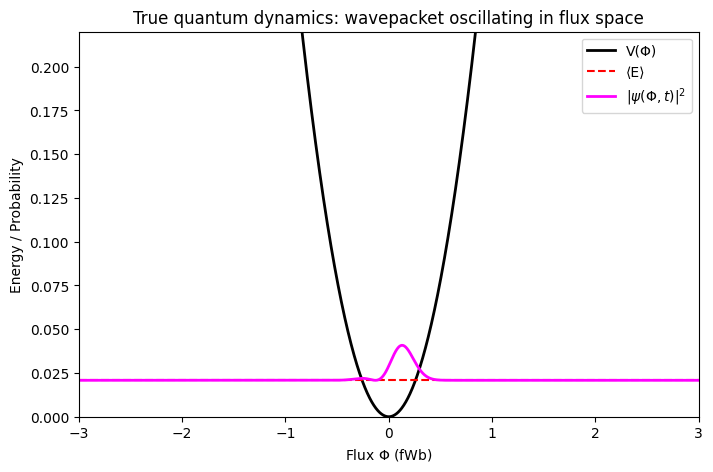

In [10]:
# Real physical animation: time-dependent wavepacket in flux space for LC circuit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.constants import hbar, e
from scipy.special import hermite
from math import factorial
import os

# Parameters
L = 10e-9
C = 100e-15
omega = 1/np.sqrt(L*C)

# Flux axis
phi_max = 3e-15
phi = np.linspace(-phi_max, phi_max, 1800)

# Potential in meV
V_meV = (phi**2/(2*L))/e*1e3

# Energy levels (J)
def energy(n):
    return hbar*omega*(n + 0.5)

# Harmonic oscillator eigenstates in flux space
xi = phi*np.sqrt(C*omega/hbar)

def psi_n(n):
    Hn = hermite(n)(xi)
    norm = 1/np.sqrt(2**n * factorial(n)) * (C*omega/(np.pi*hbar))**0.25
    return norm * Hn * np.exp(-xi**2/2)

# Choose a true wavepacket: superposition n=0 and n=1
psi0 = psi_n(0)
psi1 = psi_n(1)

# Normalize (numerical safety)
def normalize(psi):
    return psi / np.sqrt(np.trapz(np.abs(psi)**2, phi))

psi0 = normalize(psi0)
psi1 = normalize(psi1)

# Time grid (one period)
T = 2*np.pi/omega
times = np.linspace(0, T, 140)

# Figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-phi_max*1e15, phi_max*1e15)  # fWb
ax.set_ylim(0, 0.22)
ax.set_xlabel(r"Flux $\Phi$ (fWb)")
ax.set_ylabel("Energy / Probability")

# Plot potential
ax.plot(phi*1e15, V_meV, color="black", lw=2, label="V(Φ)")

# Energy reference (mean)
E_mean_meV = ((energy(0) + energy(1)) / 2) / e * 1e3
ax.axhline(E_mean_meV, color="red", ls="--", label="⟨E⟩")

# Wavepacket |psi|^2
line, = ax.plot([], [], color="magenta", lw=2, label=r"$|\psi(\Phi,t)|^2$")
ax.legend()
ax.set_title("True quantum dynamics: wavepacket oscillating in flux space")

def update(t):
    # Time evolution of superposition

    psi_t = (psi0 * np.exp(-1j * energy(0) * t / hbar)     +
             psi1 * np.exp(-1j * energy(1) * t / hbar)) / np.sqrt(2)
    prob = np.abs(psi_t)**2
    prob = prob / prob.max()          # normalize vertically
    line.set_data(phi*1e15, E_mean_meV + prob * 0.02)
    return line,

ani = FuncAnimation(fig, update, frames=times, interval=80)

# Save GIF in current directory (or change to a path that exists)
gif_path = os.path.join(".", "paquet_ondes_flux_LC.gif")
ani.save(gif_path, writer=PillowWriter(fps=12))

print("GIF saved to:", gif_path)


/tmp/ipython-input-3990302872.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(np.abs(psi)**2, phi))


GIF saved to: ./paquet_ondes_flux_LC_n1_n2.gif


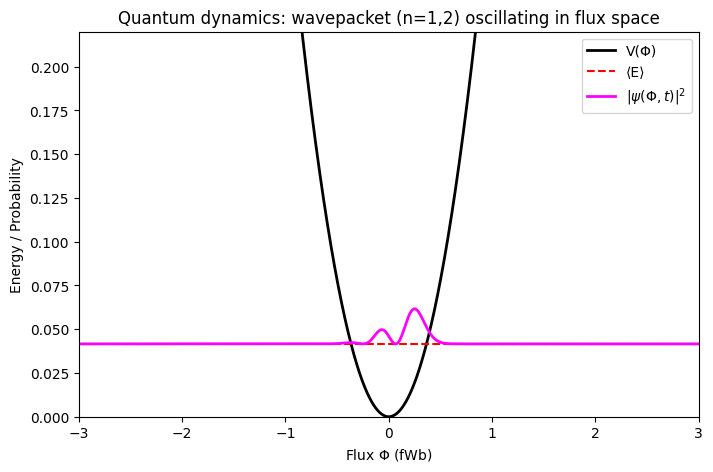

In [6]:
# Animation: paquet d'ondes (n=1 et n=2) dans l'espace des flux pour un circuit LC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.constants import hbar, e
from scipy.special import hermite
from math import factorial
import os

# Paramètres du LC
L = 10e-9
C = 100e-15
omega = 1/np.sqrt(L*C)

# Axe des flux
phi_max = 3e-15
phi = np.linspace(-phi_max, phi_max, 1800)

# Potentiel en meV
V_meV = (phi**2/(2*L))/e*1e3

# Énergie d'un niveau n (J)
def energy(n):
    return hbar * omega * (n + 0.5)

# Variable adimensionnée
xi = phi * np.sqrt(C * omega / hbar)

# États propres de l'oscillateur harmonique en flux
def psi_n(n):
    Hn = hermite(n)(xi)  # Polynôme d'Hermite H_n(xi)
    norm = 1/np.sqrt(2**n * factorial(n)) * (C*omega/(np.pi*hbar))**0.25
    return norm * Hn * np.exp(-xi**2/2)

# Paquet d'ondes: superposition n = 1 et n = 2
psi1 = psi_n(1)
psi2 = psi_n(2)

# Normalisation numérique
def normalize(psi):
    return psi / np.sqrt(np.trapz(np.abs(psi)**2, phi))

psi1 = normalize(psi1)
psi2 = normalize(psi2)

# Grille de temps (une période)
T = 2 * np.pi / omega
times = np.linspace(0, T, 140)

# Figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-phi_max*1e15, phi_max*1e15)  # en fWb
ax.set_ylim(0, 0.22)
ax.set_xlabel(r"Flux $\Phi$ (fWb)")
ax.set_ylabel("Energy / Probability")

# Potentiel
ax.plot(phi*1e15, V_meV, color="black", lw=2, label="V(Φ)")

# Énergie moyenne du paquet (n=1,2)
E_mean_meV = ((energy(1) + energy(2)) / 2) / e * 1e3
ax.axhline(E_mean_meV, color="red", ls="--", label="⟨E⟩")

# Courbe |psi|^2
line, = ax.plot([], [], color="magenta", lw=2,
                label=r"$|\psi(\Phi,t)|^2$")
ax.legend()
ax.set_title("Quantum dynamics: wavepacket (n=1,2) oscillating in flux space")

# Mise à jour temporelle
def update(t):
    psi_t = (psi1 * np.exp(-1j * energy(1) * t / hbar) +
             psi2 * np.exp(-1j * energy(2) * t / hbar)) / np.sqrt(2)
    prob = np.abs(psi_t)**2
    prob = prob / prob.max()
    line.set_data(phi*1e15, E_mean_meV + prob * 0.02)
    return line,

ani = FuncAnimation(fig, update, frames=times, interval=80)

# Sauvegarde du GIF dans le dossier courant (Colab: racine de la session)
gif_path = os.path.join(".", "paquet_ondes_flux_LC_n1_n2.gif")
ani.save(gif_path, writer=PillowWriter(fps=12))

print("GIF saved to:", gif_path)


/tmp/ipython-input-2105648980.py:43: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return psi / np.sqrt(np.trapz(np.abs(psi)**2, phi))


GIF saved to: ./LC_flux_dynamique_n0_n1_n2_n3.gif


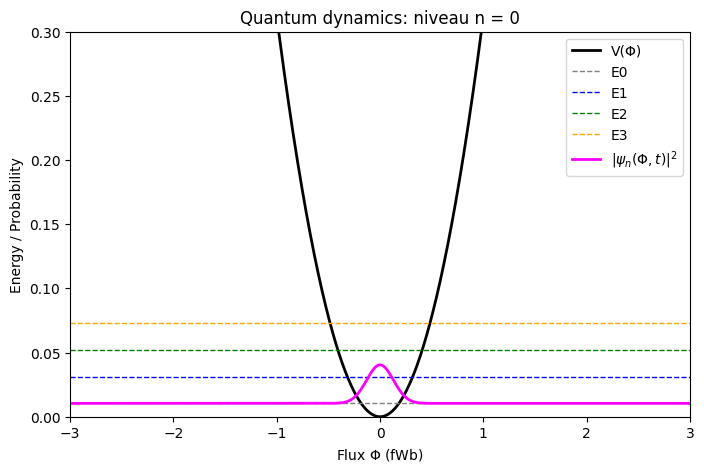

In [8]:
# Animation séquentielle : n = 0, 1, 2, 3 (dynamique)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.constants import hbar, e
from scipy.special import hermite
from math import factorial
import os

# Paramètres LC
L = 10e-9
C = 100e-15
omega = 1/np.sqrt(L*C)

# Axe des flux
phi_max = 3e-15
phi = np.linspace(-phi_max, phi_max, 1800)

# Potentiel en meV
V_meV = (phi**2/(2*L))/e*1e3

# Énergie d'un niveau n
def energy(n):
    return hbar * omega * (n + 0.5)

# Variable adimensionnée
xi = phi * np.sqrt(C * omega / hbar)

# États propres de l'oscillateur harmonique
def psi_n(n):
    Hn = hermite(n)(xi)
    norm = 1/np.sqrt(2**n * factorial(n)) * (C*omega/(np.pi*hbar))**0.25
    return norm * Hn * np.exp(-xi**2/2)

# États n = 0,1,2,3
psi0 = psi_n(0)
psi1 = psi_n(1)
psi2 = psi_n(2)
psi3 = psi_n(3)

# Normalisation numérique
def normalize(psi):
    return psi / np.sqrt(np.trapz(np.abs(psi)**2, phi))

psi0 = normalize(psi0)
psi1 = normalize(psi1)
psi2 = normalize(psi2)
psi3 = normalize(psi3)

# Temps : une période pour chaque niveau
T = 2 * np.pi / omega
n_frames_per_block = 80
total_blocks = 4          # n = 0,1,2,3
total_frames = total_blocks * n_frames_per_block
times = np.linspace(0, T, n_frames_per_block)

# Figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-phi_max*1e15, phi_max*1e15)
ax.set_ylim(0, 0.30)
ax.set_xlabel(r"Flux $\Phi$ (fWb)")
ax.set_ylabel("Energy / Probability")

# Potentiel
ax.plot(phi*1e15, V_meV, color="black", lw=2, label="V(Φ)")

# Lignes d'énergie E0..E3
E0_meV = energy(0)/e*1e3
E1_meV = energy(1)/e*1e3
E2_meV = energy(2)/e*1e3
E3_meV = energy(3)/e*1e3
ax.axhline(E0_meV, color="gray",  ls="--", lw=1, label="E0")
ax.axhline(E1_meV, color="blue",  ls="--", lw=1, label="E1")
ax.axhline(E2_meV, color="green", ls="--", lw=1, label="E2")
ax.axhline(E3_meV, color="orange",ls="--", lw=1, label="E3")

# Courbe |psi|^2
line, = ax.plot([], [], color="magenta", lw=2,
                label=r"$|\psi_n(\Phi,t)|^2$")
ax.legend()
title = ax.set_title("")

def update(frame):
    block = frame // n_frames_per_block   # 0,1,2,3
    i = frame % n_frames_per_block
    t = times[i]

    if block == 0:
        n = 0
        psi = psi0 * np.exp(-1j * energy(0) * t / hbar)
        E_ref = E0_meV
    elif block == 1:
        n = 1
        psi = psi1 * np.exp(-1j * energy(1) * t / hbar)
        E_ref = E1_meV
    elif block == 2:
        n = 2
        psi = psi2 * np.exp(-1j * energy(2) * t / hbar)
        E_ref = E2_meV
    else:
        n = 3
        psi = psi3 * np.exp(-1j * energy(3) * t / hbar)
        E_ref = E3_meV

    prob = np.abs(psi)**2
    prob = prob / prob.max()

    line.set_data(phi*1e15, E_ref + prob * 0.03)
    title.set_text(f"Quantum dynamics: niveau n = {n}")
    return line, title

ani = FuncAnimation(fig, update,
                    frames=total_frames,
                    interval=80)

gif_path = os.path.join(".", "LC_flux_dynamique_n0_n1_n2_n3.gif")
ani.save(gif_path, writer=PillowWriter(fps=12))

print("GIF saved to:", gif_path)
